In [ ]:
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

#Данные

Загрузим Данные


In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#we also need data for cross-validation

# Reserve 10,000 samples for validation
X_val = X_train[-10000:]
Y_val = Y_train[-10000:]

X_train = X_train[:-10000]
Y_train = Y_train[:-10000]

# normalization more or less
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_test /= 255
X_val /= 255


Посмтоим на них. Оценим форму и количество данных

In [ ]:
print("Data shape is %s " % (str(X_train.shape[1:])))
print ("There are %d items in the train data and %d items in the test data" % (len(X_train), len(X_test)))

img_rows, img_cols = X_train.shape[1:]

Data shape is (28, 28) 
There are 50000 items in the train data and 10000 items in the test data


Посмотрим выборочно на 16 картинок


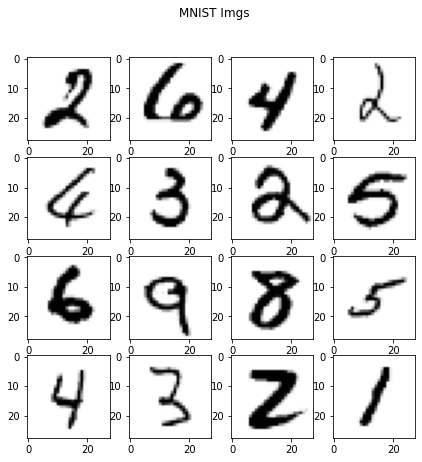

In [ ]:
fig, axs = plt.subplots(4,4, figsize=(7, 7))
fig.suptitle("MNIST Imgs")
for ax,item in zip(axs.flat, X_train[ np.random.choice(len(X_train), 16) ] ):
  ax.imshow(item, cmap = "Greys")

Вообще по-хорошему нужно бы данные аугментировать, по пока оставим как есть


# Full Dense NN

Сделаем НС состоящию просто из полносвязных слоев

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
# flatten images
X_train_flat = X_train.reshape((X_train.shape[0], -1))
print("Flat Train Data Shape = ", X_train_flat.shape)

X_val_flat = X_val.reshape((X_val.shape[0], -1))
print("Flat Validation Data Shape = ", X_val_flat.shape)

flat_input = X_train_flat.shape[1]

Flat Train Data Shape =  (50000, 784)
Flat Validation Data Shape =  (10000, 784)


In [ ]:
# one-hot encode the target
Y_train_oh = keras.utils.to_categorical(Y_train, 10)
Y_val_oh = keras.utils.to_categorical(Y_val, 10)
Y_test_oh = keras.utils.to_categorical(Y_test, 10)

print(Y_train_oh.shape)
print(Y_train_oh[:3], Y_train[:3])

(50000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] [5 0 4]


In [ ]:
keras.backend.clear_session()
model = Sequential()  # it is a feed-forward network without loops
model.add(Dense(256, input_shape=(img_rows * img_cols,))) 
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'] 
)

In [ ]:
batch_size = 500
epochs = 40

model.fit(
    X_train_flat, 
    Y_train_oh,
    batch_size=batch_size, 
    epochs=epochs,
    validation_data=(X_val_flat, Y_val_oh),
    verbose=1
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 1s 13us/step - loss: 1.5214 - accuracy: 0.4904 - val_loss: 0.5775 - val_accuracy: 0.8638
Epoch 2/40
50000/50000 [==============================] - 1s 10us/step - loss: 0.6074 - accuracy: 0.8132 - val_loss: 0.3431 - val_accuracy: 0.9050
Epoch 3/40
50000/50000 [==============================] - 1s 10us/step - loss: 0.4548 - accuracy: 0.8655 - val_loss: 0.2836 - val_accuracy: 0.9176
Epoch 4/40
50000/50000 [==============================] - 0s 10us/step - loss: 0.3907 - accuracy: 0.8836 - val_loss: 0.2531 - val_accuracy: 0.9268
Epoch 5/40
50000/50000 [==============================] - 1s 10us/step - loss: 0.3527 - accuracy: 0.8940 - val_loss: 0.2302 - val_accuracy: 0.9318
Epoch 6/40
50000/50000 [==============================] - 1s 10us/step - loss: 0.3188 - accuracy: 0.9058 - val_loss: 0.2133 - val_accuracy: 0.9367
Epoch 7/40
50000/50000 [==============================] - 1s 11us/st

Посмотрим, опять таки выборочно на предсказания (возьмем 36 примеров)

In [ ]:
def Show_Imgs_And_Prediction(model, X_test, need_to_flattern = True):
  choice = np.random.choice(len( X_test ), 36)
  input_data = X_test[ choice ]
  Y_data = Y_test[choice]
  predictions =  model.predict(input_data.reshape(input_data.shape[0], -1)) if need_to_flattern else model.predict( input_data )
  imgs = input_data.reshape(input_data.shape[0], img_rows, img_cols)                           
  fig, axs = plt.subplots(6,6, figsize=(10, 10), constrained_layout=True)
  fig.suptitle("Imgs vs Prediction")
  for ax,img,pred,y in zip(axs.flat, imgs, predictions, Y_data ):
    ax.imshow(img, cmap = "Greys")
    ax.set_title( str(np.argmax(pred)), {'fontsize': 30} )
    if (y != np.argmax(pred)):
      for spine in ax.spines.values():
          spine.set_edgecolor('red')


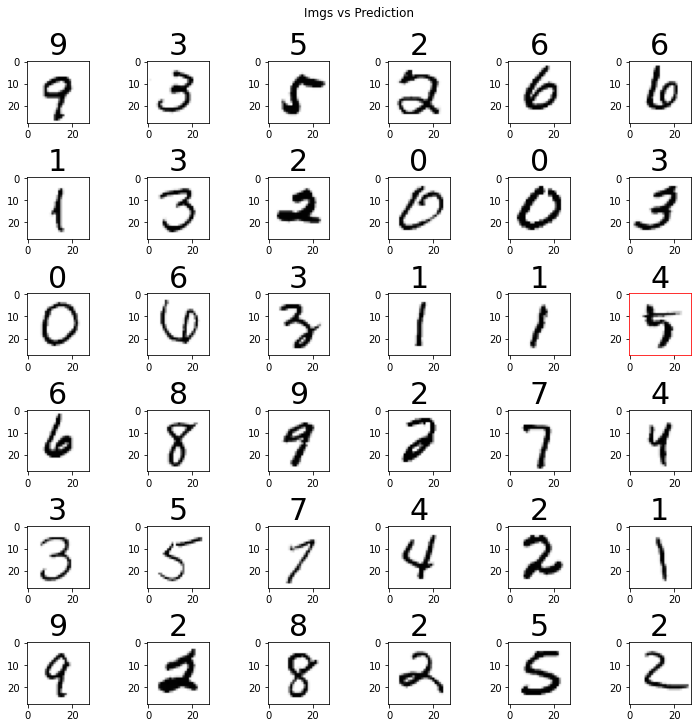

In [ ]:
Show_Imgs_And_Prediction(model, X_test)

Ну и посмотрим на результаты

In [ ]:
score = model.evaluate(X_test.reshape(X_test.shape[0], -1), Y_test_oh, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08004967314810492
Test accuracy: 0.9753000140190125


#CNN

In [ ]:
if keras.backend.image_data_format() == 'channels_first':
    X_train_CNN = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test_CNN = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    X_val_CNN = X_val.reshape(X_val.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train_CNN = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test_CNN = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    X_val_CNN = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [ ]:
keras.backend.clear_session()
model_CNN = Sequential()
model_CNN.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape= input_shape))
model_CNN.add(MaxPooling2D(pool_size=( 2, 2 )))
model_CNN.add(Conv2D(16, (2, 2), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.25))
model_CNN.add(Conv2D(16, (2, 2), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.25))
model_CNN.add(Flatten())
model_CNN.add(Dense(128, activation='relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(10, activation='softmax'))


In [ ]:
model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 16)        2064      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 16)          1040      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 16)         

In [ ]:
model_CNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

Обратим внимание на количество теренируемых параметров двух моделей

In [ ]:
def trainable_params_count (model):
     return int ( np.sum ([K.count_params(p) for p in model.trainable_weights]))

In [ ]:
print ("There are:\n \t %d trainable params in full dense NN \n \t %d trainable params in CNN" % (
       trainable_params_count(model),
       trainable_params_count(model_CNN) ) )

There are:
 	 269322 trainable params in full dense NN 
 	 13034 trainable params in CNN


Тобишь, мы уменьшили количество тренируемых параметров -> время обучения

In [ ]:
model_CNN.fit(X_train_CNN, Y_train_oh,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=( X_val_CNN, Y_val_oh ) )

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 1s 25us/step - loss: 1.8163 - accuracy: 0.3552 - val_loss: 0.7028 - val_accuracy: 0.8200
Epoch 2/40
50000/50000 [==============================] - 1s 20us/step - loss: 0.8160 - accuracy: 0.7315 - val_loss: 0.3492 - val_accuracy: 0.9089
Epoch 3/40
50000/50000 [==============================] - 1s 20us/step - loss: 0.5822 - accuracy: 0.8131 - val_loss: 0.2385 - val_accuracy: 0.9394
Epoch 4/40
50000/50000 [==============================] - 1s 20us/step - loss: 0.4917 - accuracy: 0.8445 - val_loss: 0.1972 - val_accuracy: 0.9496
Epoch 5/40
50000/50000 [==============================] - 1s 20us/step - loss: 0.4281 - accuracy: 0.8653 - val_loss: 0.1639 - val_accuracy: 0.9567
Epoch 6/40
50000/50000 [==============================] - 1s 19us/step - loss: 0.3798 - accuracy: 0.8794 - val_loss: 0.1462 - val_accuracy: 0.9599
Epoch 7/40
50000/50000 [==============================] - 1s 19us/st

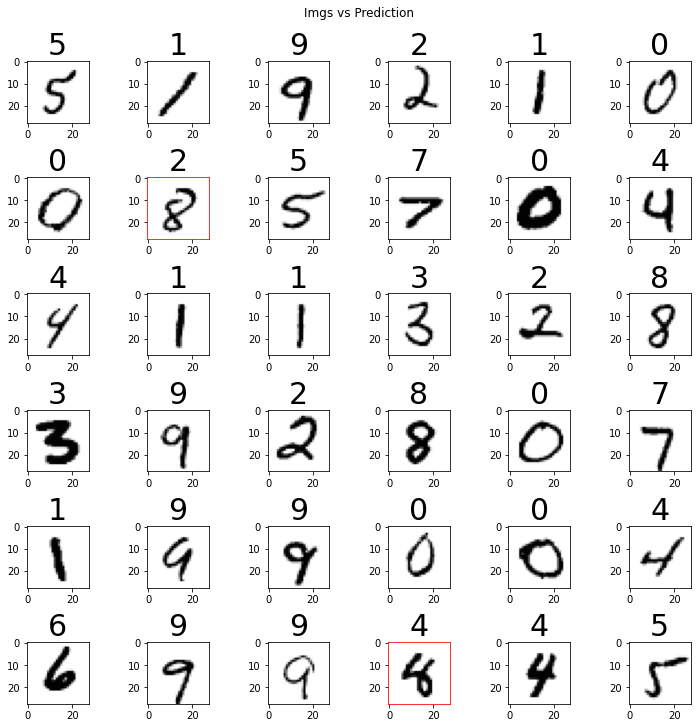

In [ ]:
Show_Imgs_And_Prediction(model_CNN, X_test_CNN, False)

In [ ]:
score = model_CNN.evaluate(X_test_CNN, Y_test_oh, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05739269459070638
Test accuracy: 0.9829999804496765


In [ ]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
import seaborn as sns

canvas_html = """
<canvas width=%d height=%d style="border:1px solid #000000;"></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.png', w=28, h=28, line_width=3):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])

  with open(filename, 'wb') as f:
    f.write(binary)


  img = keras.preprocessing.image.load_img('drawing.png',color_mode='rgba', target_size=(28,28))
  img = keras.preprocessing.image.img_to_array(img)/255
  img = np.mean(img,-1)
  predictions =  model.predict(img.reshape(1,28*28))
  plt.imshow(img)
  fig, ax = plt.subplots(figsize = (10,1))

  sns.heatmap(predictions, cbar = False, cmap ='Greens', ax = ax, annot =True, fmt = '.2f')

# НЕ knn

Посчитаем центроиды тренеровочных данных

In [ ]:
import tensorflow as tf

In [ ]:
Centroids = np.zeros([10, img_rows * img_cols])
element_qty = np.int_(np.zeros([10]))

In [ ]:
for (item, digit) in zip(X_train_flat, Y_train):
  Centroids[np.int_(digit)] += item
  element_qty[np.int(digit)] += 1

In [ ]:
for digit in range(10):
  Centroids[np.int_(digit)] /=  element_qty[np.int(digit)]
  Centroids[np.int_(digit)] /= np.linalg.norm( Centroids[np.int_(digit)])

Посмотрим как выглядит средний центроид

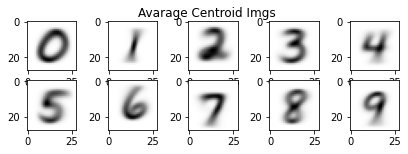

In [ ]:
fig, axs = plt.subplots(2,5, figsize=(7, 2))
fig.suptitle("Avarage Centroid Imgs")
for ax,item in zip(axs.flat, Centroids ):
  ax.imshow(item.reshape(28,28), cmap = "Greys")

Круто)))

Но продлжим.
Теперь объеденим тестовую и валидационную выборку и попробуем отнести вск к одной из цифр


In [ ]:
X_test_and_val = np.concatenate( (X_test.reshape( [X_test.shape[0], img_rows * img_cols]), X_val_flat) , axis = 0)
Y_test_and_val = np.concatenate( (Y_test, Y_val) , axis = 0)
Centroids_norms = np.array( [np.linalg.norm(cent) for cent in Centroids ] )

In [ ]:
def classify_cos (item, Centroids_ptr):
  cos_dists = np.float_(np.zeros(10))
  for i in range(10):
    cos_dists[i] = item.dot(Centroids_ptr[i].transpose())/(np.linalg.norm(item) * Centroids_norms[i])
  return np.argmax(cos_dists)

In [ ]:
Y_pred = np.int_(np.zeros(X_test_and_val.shape[0]))
for (i, item) in enumerate(X_test_and_val):
  Y_pred[i] = classify_cos(item, Centroids)

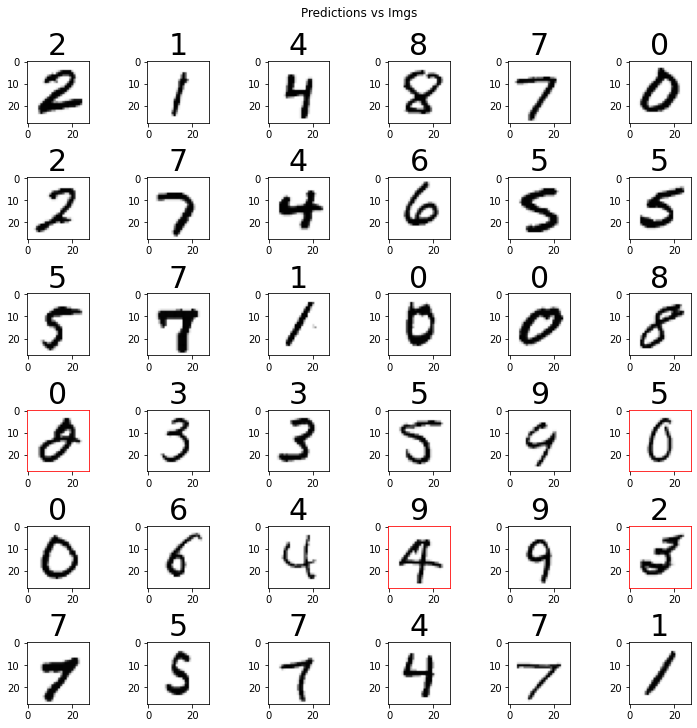

In [ ]:
choice = np.random.choice(len( X_test_and_val ), 36)

fig, axs = plt.subplots( 6, 6, figsize=(10, 10), constrained_layout=True)
fig.suptitle("Predictions vs Imgs")
for ax, i in zip(axs.flat, choice):
  ax.imshow(X_test_and_val[i].reshape(28,28), cmap = "Greys")
  ax.set_title( str(Y_pred[i]), {'fontsize': 30} )
  if (Y_test_and_val[i] != Y_pred[i]):
    for spine in ax.spines.values():
        spine.set_edgecolor('red')


In [ ]:
def accuracy (Y_original, Y_predicted):
  correctly_match = 0
  for (y_real, y_pred) in zip (Y_original, Y_predicted):
    correctly_match += 1 if y_real == y_pred else 0
  return correctly_match / np.float(Y_original.shape[0])

In [ ]:
print ( accuracy (Y_test_and_val, Y_pred) )

0.82945


Проверим в метрике эйлера

In [ ]:
def classify_eul (item, Centroids_ptr):
  dists = np.float_(np.zeros(10))
  for i in range(10):
    dists[i] = (item - Centroids_ptr[i]).dot(item - Centroids_ptr[i].transpose())
  return np.argmin(dists)

In [ ]:
Y_pred_eul = np.int_(np.zeros(X_test_and_val.shape[0]))
for (i, item) in enumerate(X_test_and_val):
  Y_pred_eul[i] = classify_eul(item, Centroids)

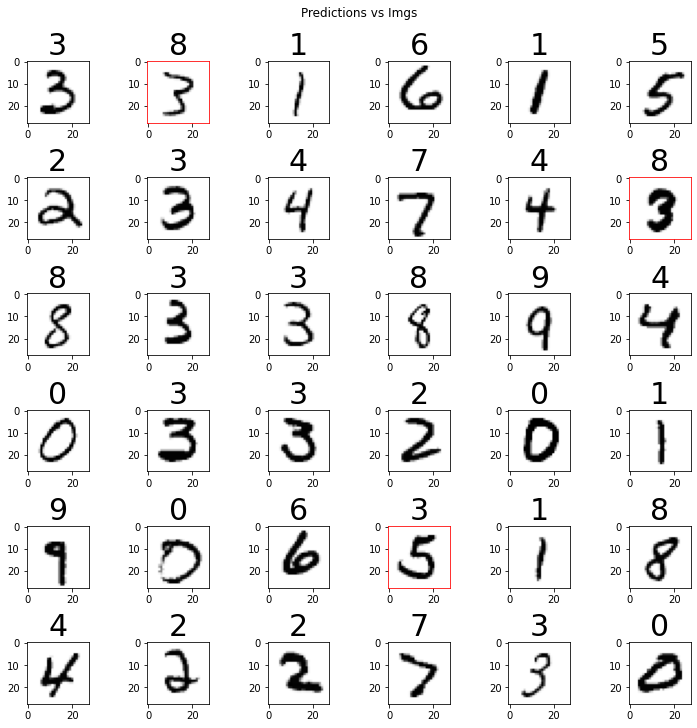

In [ ]:
choice = np.random.choice(len( X_test_and_val ), 36)

fig, axs = plt.subplots( 6, 6, figsize=(10, 10), constrained_layout=True)
fig.suptitle("Predictions vs Imgs")
for ax, i in zip(axs.flat, choice):
  ax.imshow(X_test_and_val[i].reshape(28,28), cmap = "Greys")
  ax.set_title( str(Y_pred_eul[i]), {'fontsize': 30} )
  if (Y_test_and_val[i] != Y_pred_eul[i]):
    for spine in ax.spines.values():
        spine.set_edgecolor('red')


In [ ]:
print ( accuracy (Y_test_and_val, Y_pred_eul) )

0.82945


Точности не ахти, но зато ничего не пришлось треннировать, все очень шустро)


#kNN via Ball Tree 
Ничего не хочу комментировать

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_kNN = KNeighborsClassifier(n_neighbors=5, algorithm = 'ball_tree', leaf_size= 5)
model_kNN.fit(X_train_flat, Y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

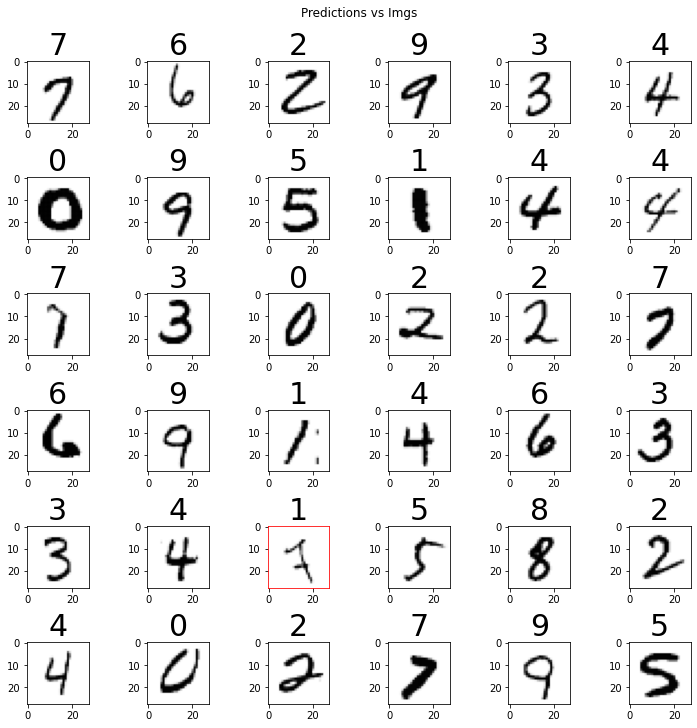

In [ ]:
choice = np.random.choice(len( X_test_and_val ), 36)
Y_pred_knn = model_kNN.predict(X_test_and_val[choice])
Y_real = Y_test_and_val[choice]
imgs = X_test_and_val[choice]
fig, axs = plt.subplots( 6, 6, figsize=(10, 10), constrained_layout=True)
fig.suptitle("Predictions vs Imgs")
for i, ax in enumerate(axs.flat):
  ax.imshow(imgs[i].reshape(28,28), cmap = "Greys")
  ax.set_title( str(Y_pred_knn[i]), {'fontsize': 30} )
  if (Y_real[i] != Y_pred_knn[i]):
    for spine in ax.spines.values():
        spine.set_edgecolor('red')


In [ ]:
model_kNN.score(X_test_and_val, Y_test_and_val)

0.9691